In [1]:
from IPython.display import display
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/DATN/data_pre.csv')
display(data.head(5))

,date,temp,feelslike,mintemp,maxtemp,humidity,windspeed,winddeg,weatherid,weathermain,weatherdescription
0,1/1/2023,19.64,18.94,18.98,20.02,49,1.54,110,800,Clear,sky is clear
1,1/2/2023,18.05,17.27,17.18,20.02,52,3.10,20,800,Clear,sky is clear
2,1/3/2023,18.75,18.22,18.29,19.02,59,4.12,360,802,Clouds,scattered clouds
3,1/4/2023,20.54,20.11,20.13,21.02,56,2.10,60,803,Clouds,broken clouds
4,1/5/2023,19.67,19.57,19.15,20.02,72,2.60,40,803,Clouds,broken clouds


In [2]:
df_normal = pd.read_csv('/content/drive/MyDrive/DATN/datanormal_maxtemp.csv')
display(df_normal)

,maxtemp,mintemp,temp,feelslike
0,0.311493,0.310242,0.315494,0.256978
1,0.311493,0.243203,0.255988,0.208921
2,0.274890,0.284544,0.282186,0.236259
3,0.348097,0.353073,0.349177,0.290647
4,0.311493,0.316574,0.316617,0.275108
...,...,...,...,...
902,0.828331,0.795903,0.824476,0.869928
903,0.770864,0.749348,0.771707,0.811799
904,0.783675,0.777281,0.782934,0.837986
905,0.830527,0.780633,0.817740,0.864748


In [3]:
df_normal[:10]

,maxtemp,mintemp,temp,feelslike
0,0.311493,0.310242,0.315494,0.256978
1,0.311493,0.243203,0.255988,0.208921
2,0.274890,0.284544,0.282186,0.236259
3,0.348097,0.353073,0.349177,0.290647
4,0.311493,0.316574,0.316617,0.275108
5,0.457906,0.454376,0.442740,0.360000
6,0.408126,0.385847,0.415793,0.334964
7,0.435212,0.385847,0.438623,0.363453
8,0.445827,0.423091,0.456961,0.387914
9,0.442899,0.432030,0.437874,0.368633


In [4]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Chọn biến
features = ['maxtemp','mintemp','temp','feelslike']
data_features = df_normal[features].values

# Chọn window
window_size = 7
X_train, y_train = [], []

for i in range(len(data_features) - window_size):
    X_train.append(data_features[i:i + window_size])
    y_train.append(data_features[i + window_size])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Phân chia tập train với test
split_index = int(0.8 * len(X_train))

X_train, X_test = X_train[:split_index], X_train[split_index:]
y_train, y_test = y_train[:split_index], y_train[split_index:]

# Reshape dữ liệu cho mô hình LSTM
X_train = X_train.reshape((X_train.shape[0], window_size, X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], window_size, X_test.shape[2]))

In [5]:
X_train[:5]

array([[[0.31149341, 0.31024209, 0.31549401, 0.25697842],
        [0.31149341, 0.24320298, 0.25598802, 0.20892086],
        [0.27489019, 0.28454376, 0.28218563, 0.23625899],
        [0.34809663, 0.35307263, 0.34917665, 0.29064748],
        [0.31149341, 0.31657356, 0.31661677, 0.27510791],
        [0.4579063 , 0.45437616, 0.44273952, 0.36      ],
        [0.40812592, 0.3858473 , 0.41579341, 0.33496403]],

       [[0.31149341, 0.24320298, 0.25598802, 0.20892086],
        [0.27489019, 0.28454376, 0.28218563, 0.23625899],
        [0.34809663, 0.35307263, 0.34917665, 0.29064748],
        [0.31149341, 0.31657356, 0.31661677, 0.27510791],
        [0.4579063 , 0.45437616, 0.44273952, 0.36      ],
        [0.40812592, 0.3858473 , 0.41579341, 0.33496403],
        [0.4352123 , 0.3858473 , 0.43862275, 0.36345324]],

       [[0.27489019, 0.28454376, 0.28218563, 0.23625899],
        [0.34809663, 0.35307263, 0.34917665, 0.29064748],
        [0.31149341, 0.31657356, 0.31661677, 0.27510791],
        [0

In [6]:
y_train[:5]

array([[0.4352123 , 0.3858473 , 0.43862275, 0.36345324],
       [0.44582723, 0.42309125, 0.45696108, 0.38791367],
       [0.44289898, 0.4320298 , 0.43787425, 0.36863309],
       [0.33345534, 0.34860335, 0.34543413, 0.31165468],
       [0.33345534, 0.34860335, 0.34543413, 0.31165468]])

In [7]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64))
model.add(Dense(24))
model.add(Dense(len(features)))
model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 128)         │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,164 (465.48 KB)

 Trainable params: 119,164 (465.48 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1574
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0203
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0204
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0183
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0190
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0187
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0181
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0177
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0158
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0172
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0161
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0150
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0150
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0134
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - lo

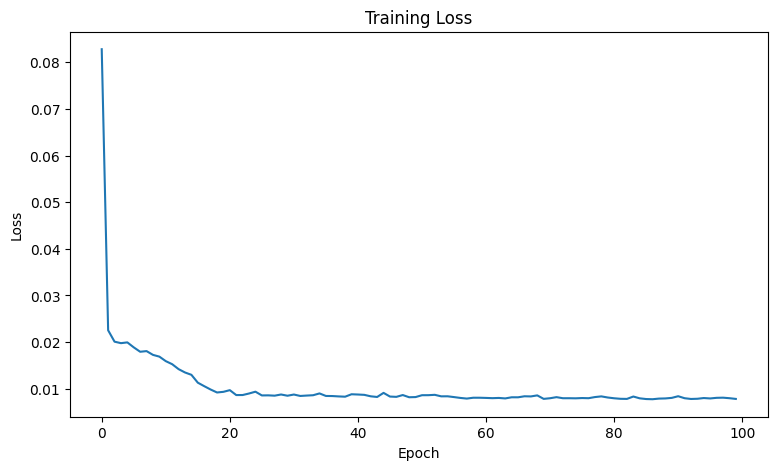

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step
Mean Absolute Error (MAE): 0.0666195356599465
Mean Squared Error (MSE): 0.008154213313336083
R2 Score: 0.8238770790885988


In [11]:
results_text = f"Mean Absolute Error (MAE): {mae}\n" \
               f"Mean Squared Error (MSE): {mse}\n" \
               f"R2 Score: {r2}\n"

with open("/content/drive/MyDrive/DATN/result_maxtemp.txt", "w") as file:
    file.write(results_text)

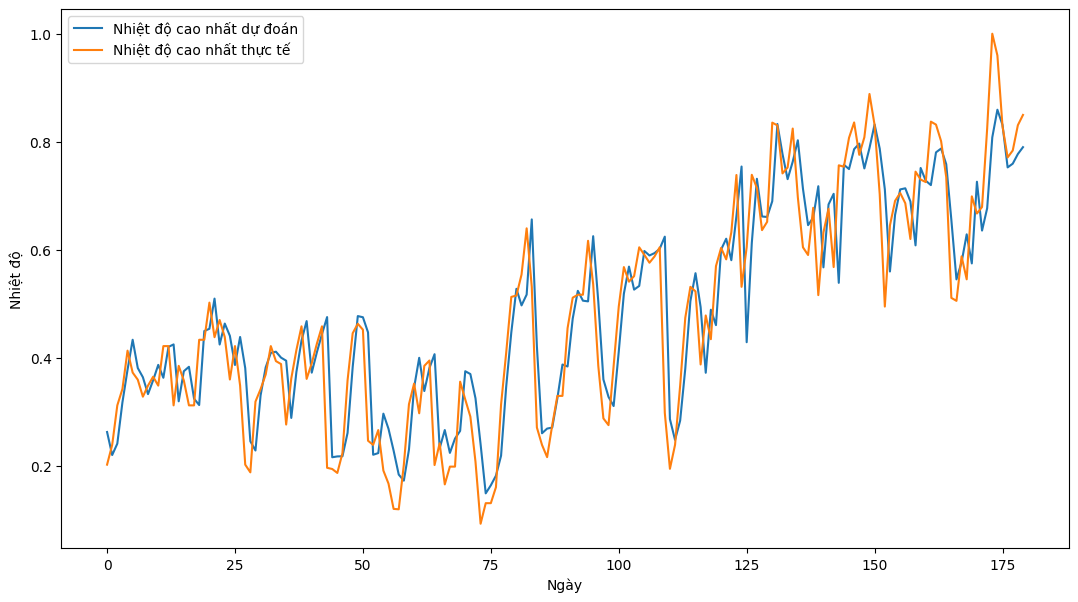

In [12]:
plt.figure(figsize=(13, 7))
plt.plot(y_pred[:,0], label='Nhiệt độ cao nhất dự đoán')
plt.plot(y_test[:,0], label='Nhiệt độ cao nhất thực tế')
plt.xlabel('Ngày')
plt.ylabel('Nhiệt độ')
plt.legend()
plt.show()

In [13]:
import sklearn
convert = sklearn.preprocessing.MinMaxScaler()
data_maxtemp = data['maxtemp'].values.reshape(-1,1)
convert.fit_transform(data_maxtemp)

y_pred_original = convert.inverse_transform(y_pred)

print("Dữ liệu dự đoán gốc:")
y_pred_original[:10]

Dữ liệu dự đoán gốc:


array([[18.671404, 18.496204, 18.568024, 17.322783],
       [17.505957, 17.340595, 17.363285, 16.142784],
       [18.082905, 17.918533, 17.978632, 16.751928],
       [20.171343, 20.008009, 20.166517, 18.80931 ],
       [21.823315, 21.636358, 21.84143 , 20.272764],
       [23.341812, 23.13049 , 23.369703, 21.617119],
       [21.910484, 21.691853, 21.873121, 20.02196 ],
       [21.444416, 21.19441 , 21.37302 , 19.487604],
       [20.590021, 20.326555, 20.474274, 18.621212],
       [21.288328, 21.013964, 21.186232, 19.357635]], dtype=float32)

In [14]:
y_original = convert.inverse_transform(y_test)
print("Dữ liệu thực tế gốc")
y_original[:10]

Dữ liệu thực tế gốc


array([[17.02      , 15.76316946, 16.08037425, 15.02425612],
       [18.02      , 16.8213743 , 16.96991018, 15.59031079],
       [20.02      , 19.19216015, 19.60784431, 17.65798273],
       [20.85      , 20.85069274, 20.85523952, 19.18318561],
       [22.79      , 22.69237616, 22.86947605, 20.55901295],
       [21.68      , 21.55277095, 21.78567365, 19.58414101],
       [21.32      , 21.50189572, 21.45848802, 19.41117986],
       [20.46      , 19.91458845, 20.31333832, 18.66430216],
       [21.02      , 20.60649162, 20.82456587, 18.86871079],
       [21.47      , 21.04401862, 21.46871257, 19.58414101]])

In [15]:
df = pd.DataFrame({
    'Pre Maxtemp': y_pred_original[:,0].flatten(),
    'Act MaxTemp': y_original[:,0].flatten()
})

# Lưu DataFrame vào tệp
df.to_csv('/content/drive/MyDrive/DATN/chart_max.csv', index=False)

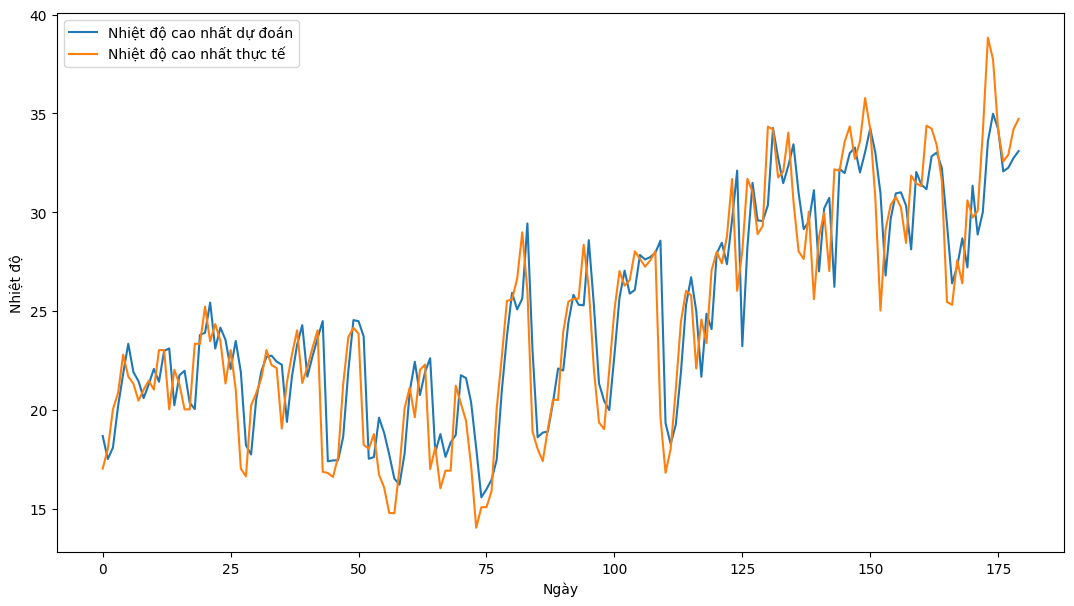

In [36]:
plt.figure(figsize=(13, 7))
plt.plot(y_pred_original[:,0], label='Nhiệt độ cao nhất dự đoán')
plt.plot(y_original[:,0], label='Nhiệt độ cao nhất thực tế')
plt.xlabel('Ngày')
plt.ylabel('Nhiệt độ')
plt.legend()
plt.show()